In [2]:
import pandas as pd
from IPython.display import HTML
from IPython.display import Image
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt
df2=pd.read_csv('../data/data_included.csv')

/var/folders/wx/k35tcjkd3mx16xkkmzntwzrc0000gn/T/ipykernel_90275/1177185029.py:7: DtypeWarning: Columns (18,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
births_data=pd.read_csv('../data/Births Data UN.csv')
births_data.drop(['Area', 'Record Type', 'Value Footnotes', 'Source Year'],axis=1,inplace=True)
births_data=births_data.query("Month in ['January','February','March','April','May','June','July','August','September','October','November','December']")
births_data

,Country or Area,Year,Month,Reliability,Value
6,Åland Islands,2020.0,January,"Final figure, complete",11.0
7,Åland Islands,2020.0,February,"Final figure, complete",24.0
8,Åland Islands,2020.0,March,"Final figure, complete",31.0
9,Åland Islands,2020.0,April,"Final figure, complete",22.0
10,Åland Islands,2020.0,May,"Final figure, complete",20.0
...,...,...,...,...,...
54796,Wallis and Futuna Islands,1973.0,August,"Final figure, complete",364.0
54797,Wallis and Futuna Islands,1973.0,September,"Final figure, complete",300.0
54798,Wallis and Futuna Islands,1973.0,October,"Final figure, complete",385.0
54799,Wallis and Futuna Islands,1973.0,November,"Final figure, complete",344.0


In [4]:
births_df=births_data.groupby('Month').sum()[['Value']]
births_df

,Value
Month,
April,8.449080e+07
August,9.257204e+07
December,8.634094e+07
February,8.228612e+07
January,9.274157e+07
July,9.187408e+07
June,8.627537e+07
March,8.805267e+07
May,8.731629e+07


In [5]:
births_df=births_df.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
births_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
births_df

,Value
Jan,9.274157e+07
Feb,8.228612e+07
Mar,8.805267e+07
Apr,8.449080e+07
May,8.731629e+07
Jun,8.627537e+07
Jul,9.187408e+07
Aug,9.257204e+07
Sep,9.286552e+07
Oct,9.115465e+07


In [6]:
births_df['births_percentage']=(births_df['Value']/births_df['Value'].sum()*100).round(2)
births_df.rename(columns={'Value':'births_count'},inplace=True)
births_df.drop('births_count',axis=1,inplace=True)

In [7]:
# Alternative method to remove Jan skew using pandas without string parsing
df2=df2[df2.birth_date.str.len()==10]
df2

,Unnamed: 0.1,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
8,8,8,male,34352d83-6fa1-463d-a02f-6157b3adf36b,"[{'identifier': '141', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/bfe/u...,[{'url': 'http://www.parlamentra.org/upload/ib...,Убирия Бежан Михайлович,1967-03-07,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,19,male,9fd33b27-fd4c-4eba-9a8f-d4d23f603c63,"[{'identifier': '/m/03fqqs', 'scheme': 'freeba...",http://www.parlamentra.org/upload/iblock/e1f/s...,[{'url': 'http://www.parlamentra.org/upload/ib...,Шамба Сергей Миронович,1951-03-15,"[{'note': 'Wikipedia (ab)', 'url': 'https://ab...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,28,male,da988bab-32d4-46c0-bb7b-5c6a6eb129e7,"[{'identifier': '46', 'scheme': 'everypolitici...",http://www.parlamentra.org/upload/iblock/b85/%...,[{'url': 'http://www.parlamentra.org/upload/ib...,Бганба Валерий Рамшухович,1953-08-26,"[{'note': 'Wikimedia Commons', 'url': 'https:/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,113,78,female,522dff9d-d21d-41b9-a7d5-c2321c819b11,"[{'identifier': '1854', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/fa...,[{'url': 'http://www.wolesi.website/Media/Imag...,Farkhunda Zahra Naderi-Kabul,1981-04-19,"[{'note': 'Wikimedia Commons', 'url': 'https:/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,207,172,female,aac6f415-446d-4070-80d9-195d4f7b77ac,"[{'identifier': '1823', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/ra...,[{'url': 'http://www.wolesi.website/Media/Imag...,Rangina Kargar-Faryab,1985-03-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66764,78373,51,female,e57828f1-e51a-41ea-a61b-7fc1b92e2b37,"[{'identifier': '109', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/dahl_ulla_britt.jpg,[{'url': 'http://www.lagtinget.ax/files/dahl_u...,Dahl Ulla-Britt,1946-03-14,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...",...,NaN,Dahl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66765,78374,52,male,e6f6e01b-bcb0-4374-8912-7e1eaf492f10,"[{'identifier': '97', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/lindfors_henry.jpg,[{'url': 'http://www.lagtinget.ax/files/lindfo...,Lindström Henry,1956-06-20,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...",...,NaN,Lindström,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66768,78377,55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...",...,NaN,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66770,78379,57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...",...,NaN,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2['birth_date']=pd.to_datetime(df2['birth_date'], errors='coerce') #y-m-d
monthly_df=df2.groupby(df2['birth_date'].dt.month).count()[['name']]
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(1).astype(str) + '%'
monthly_df.rename(columns={'name':'count'},inplace=True)
monthly_df.transpose()

# It works equally well and is more efficient

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,3549,3071,3450,3324,3460,3396,3377,3428,3337,3206,3104,3198
percentage,8.9%,7.7%,8.6%,8.3%,8.7%,8.5%,8.5%,8.6%,8.4%,8.0%,7.8%,8.0%


In [9]:

df=pd.merge(monthly_df,births_df,how='inner',left_index=True,right_index=True)
df['percentage']=(df['count']/df['count'].sum()*100).round(2)
df['difference']=df['percentage']-df['births_percentage']
df['pc_difference']=df['difference']/df['births_percentage']*100
df['pc_difference']=df['pc_difference'].round(2)
df.index=pd.CategoricalIndex(df.index, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
df

,count,percentage,births_percentage,difference,pc_difference
Jan,3549,8.89,8.73,0.16,1.83
Feb,3071,7.70,7.75,-0.05,-0.65
Mar,3450,8.65,8.29,0.36,4.34
Apr,3324,8.33,7.95,0.38,4.78
May,3460,8.67,8.22,0.45,5.47
Jun,3396,8.51,8.12,0.39,4.80
Jul,3377,8.46,8.65,-0.19,-2.20
Aug,3428,8.59,8.72,-0.13,-1.49
Sep,3337,8.36,8.74,-0.38,-4.35
Oct,3206,8.04,8.58,-0.54,-6.29


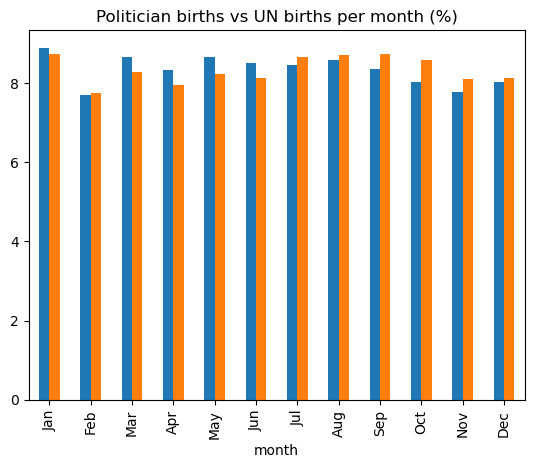

In [16]:
# Plotnine does not support secondary axes, so I have to use matplotlib
df['month'] = df.index
df['month'] = pd.Categorical(df['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
df.plot(x='month', y=['percentage','births_percentage'], legend=False, kind='bar', title='Politician births vs UN births per month (%)')
plt.show()

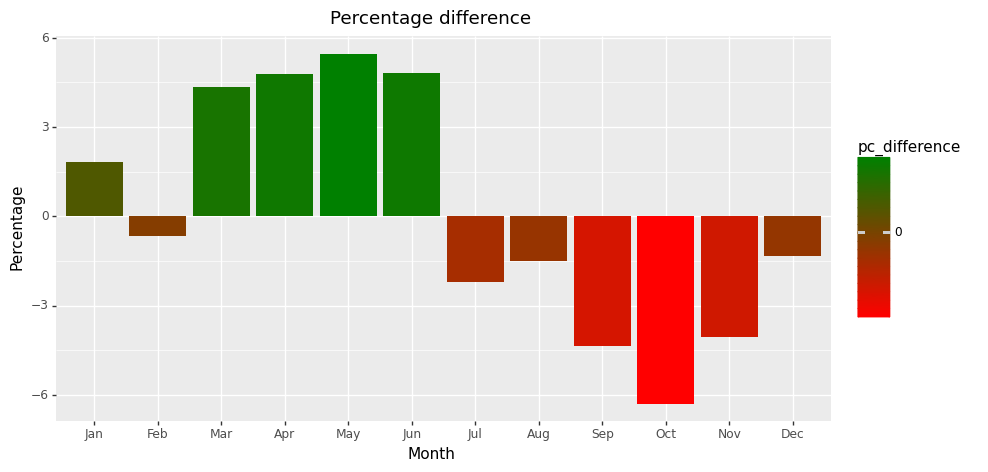

<ggplot: (170544097190)>

In [41]:
from plotnine import *
ggplot(df,aes(x='df.index',y='pc_difference', fill='pc_difference')) \
    + geom_bar(stat='identity') \
    + labs(title='Percentage difference',x='Month',y='Percentage') \
    + scale_fill_gradient(low='red',high='green', breaks=[0]) \
    + theme(figure_size=(10,5))

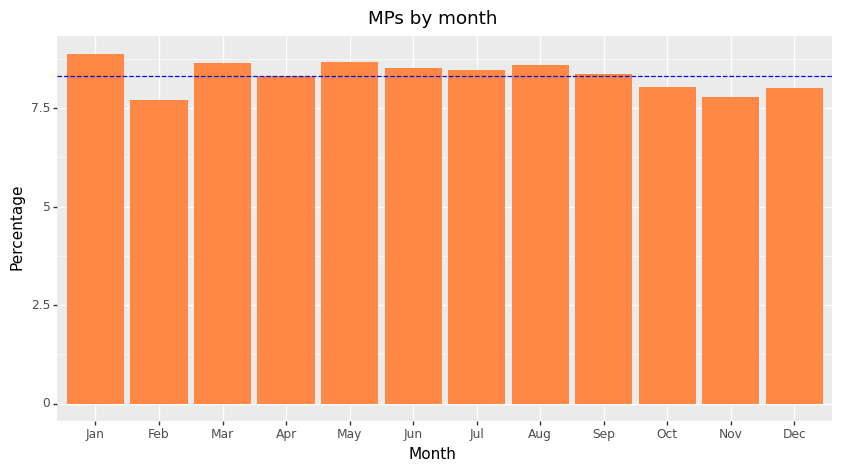

<ggplot: (170564677117)>

In [36]:
ggplot(df,aes(x='df.index',y='percentage')) \
    + geom_bar(stat='identity', fill='#FF8844') \
    + labs(title='MPs by month',x='Month',y='Percentage') \
    + geom_hline(yintercept=8.33,linetype='dashed',color='blue') \
    + theme(figure_size=(10,5))

In [37]:
df[['count', 'percentage']]

,count,percentage
Jan,3549,8.89
Feb,3071,7.70
Mar,3450,8.65
Apr,3324,8.33
May,3460,8.67
Jun,3396,8.51
Jul,3377,8.46
Aug,3428,8.59
Sep,3337,8.36
Oct,3206,8.04
